<a href="https://colab.research.google.com/github/jibin-sebastian/customer_segmentation/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Business purpose

Divide customers


1- Transactors ; customer who pays atleast interest and careful with their money

2- Revolvers : Customer who use credit as a loan. This group is most lucrative sector for bank since they pay high interest

3- New customers : new customer with low tenure

4- VIP/ PRIME : customer with high credit limit / high in % of full payment

In [54]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [55]:
#source : https://www.kaggle.com/arjunbhasin2013/ccdata
creditcard_df = pd.read_csv('Marketing_data.csv')

In [56]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [57]:
# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

In [58]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [59]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [60]:
#missing data informations

import missingno as msno

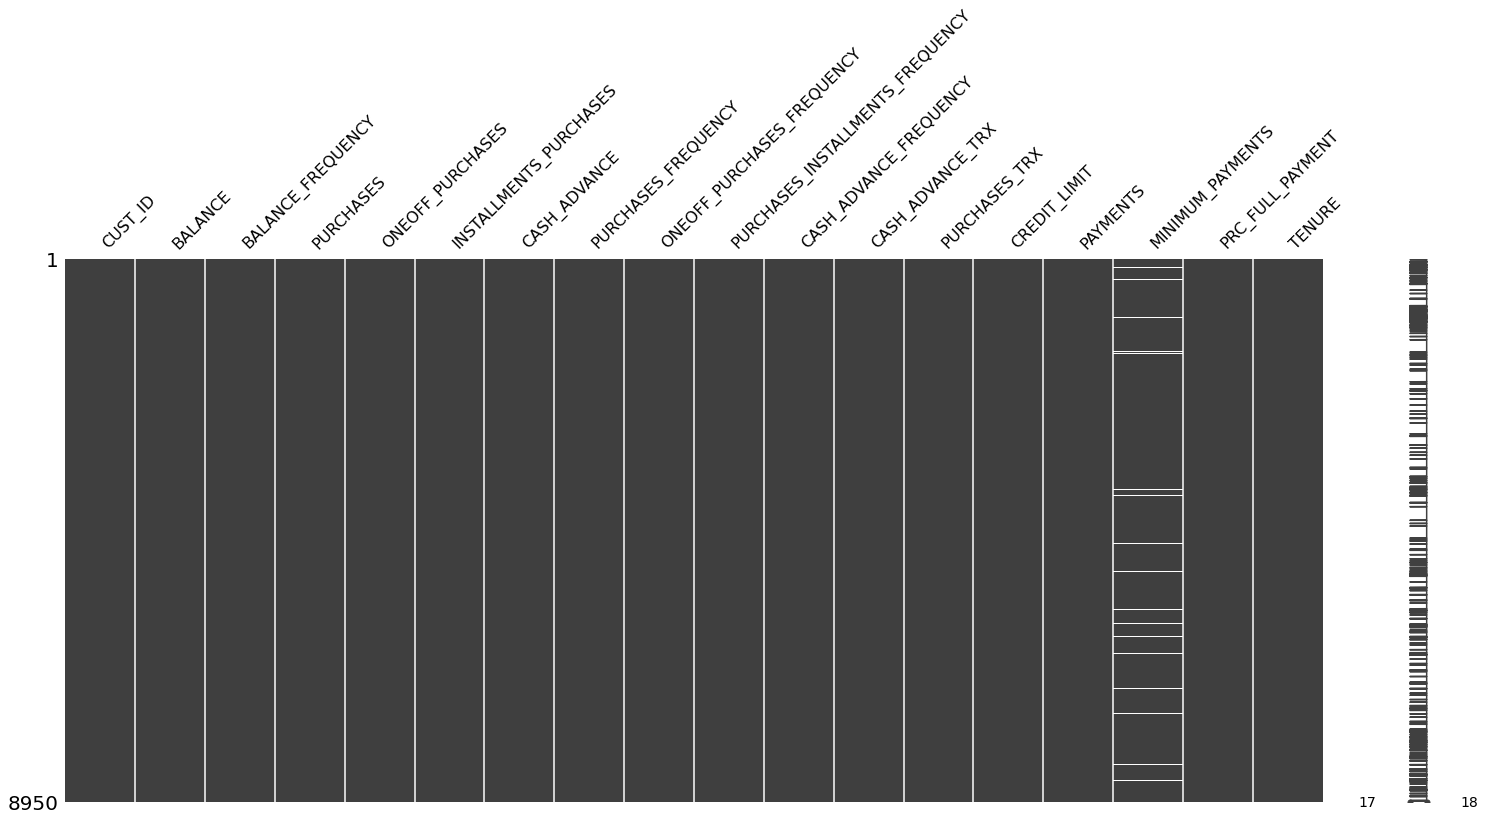

In [ ]:
msno.matrix(creditcard_df)

In [61]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [62]:
#fill the missing data with its average
## Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()


In [63]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [64]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()


In [65]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

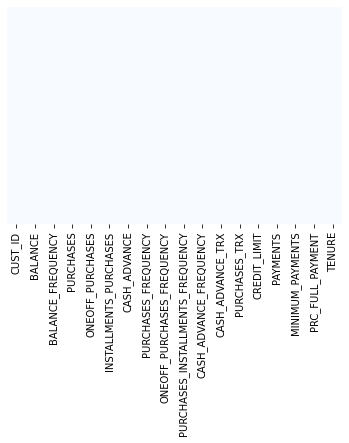

In [66]:
# Let's see if we have any missing data, luckily we don't have many!
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

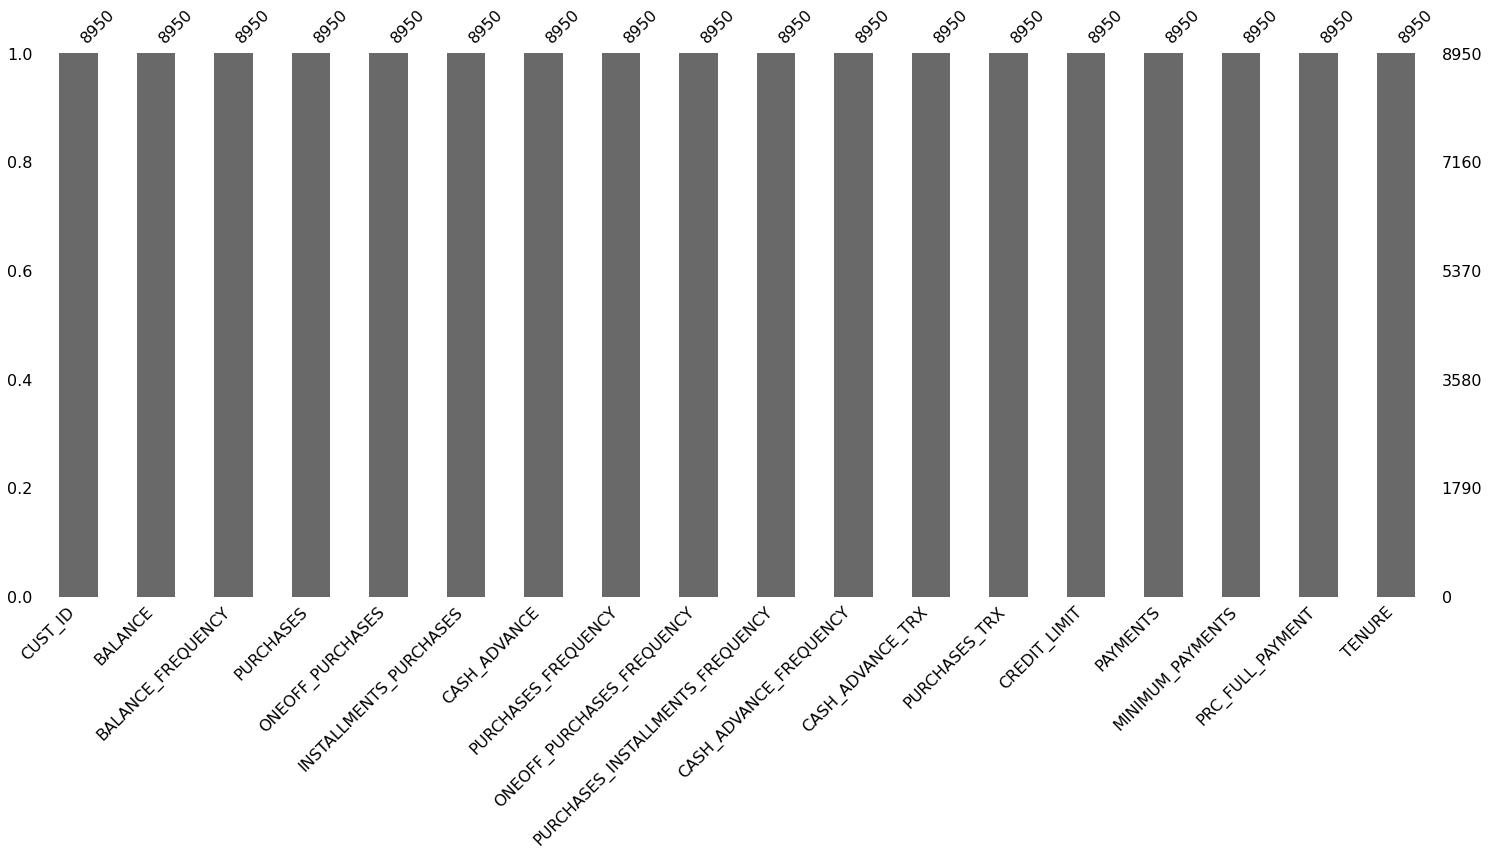

In [67]:
msno.bar(creditcard_df)

In [68]:
#check if there is any duplcates in datasets
creditcard_df.duplicated().sum()

0

In [69]:
#Drop CUST_ID col

creditcard_df.drop(['CUST_ID'], axis=1, inplace=True)

In [ ]:
creditcard_df.head

<bound method NDFrame.head of           BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT  TENURE
0       40.900749           0.818182  ...          0.000000      12
1     3202.467416           0.909091  ...          0.222222      12
2     2495.148862           1.000000  ...          0.000000      12
3     1666.670542           0.636364  ...          0.000000      12
4      817.714335           1.000000  ...          0.000000      12
...           ...                ...  ...               ...     ...
8945    28.493517           1.000000  ...          0.500000       6
8946    19.183215           1.000000  ...          0.000000       6
8947    23.398673           0.833333  ...          0.250000       6
8948    13.457564           0.833333  ...          0.250000       6
8949   372.708075           0.666667  ...          0.000000       6

[8950 rows x 17 columns]>

In [70]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [71]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

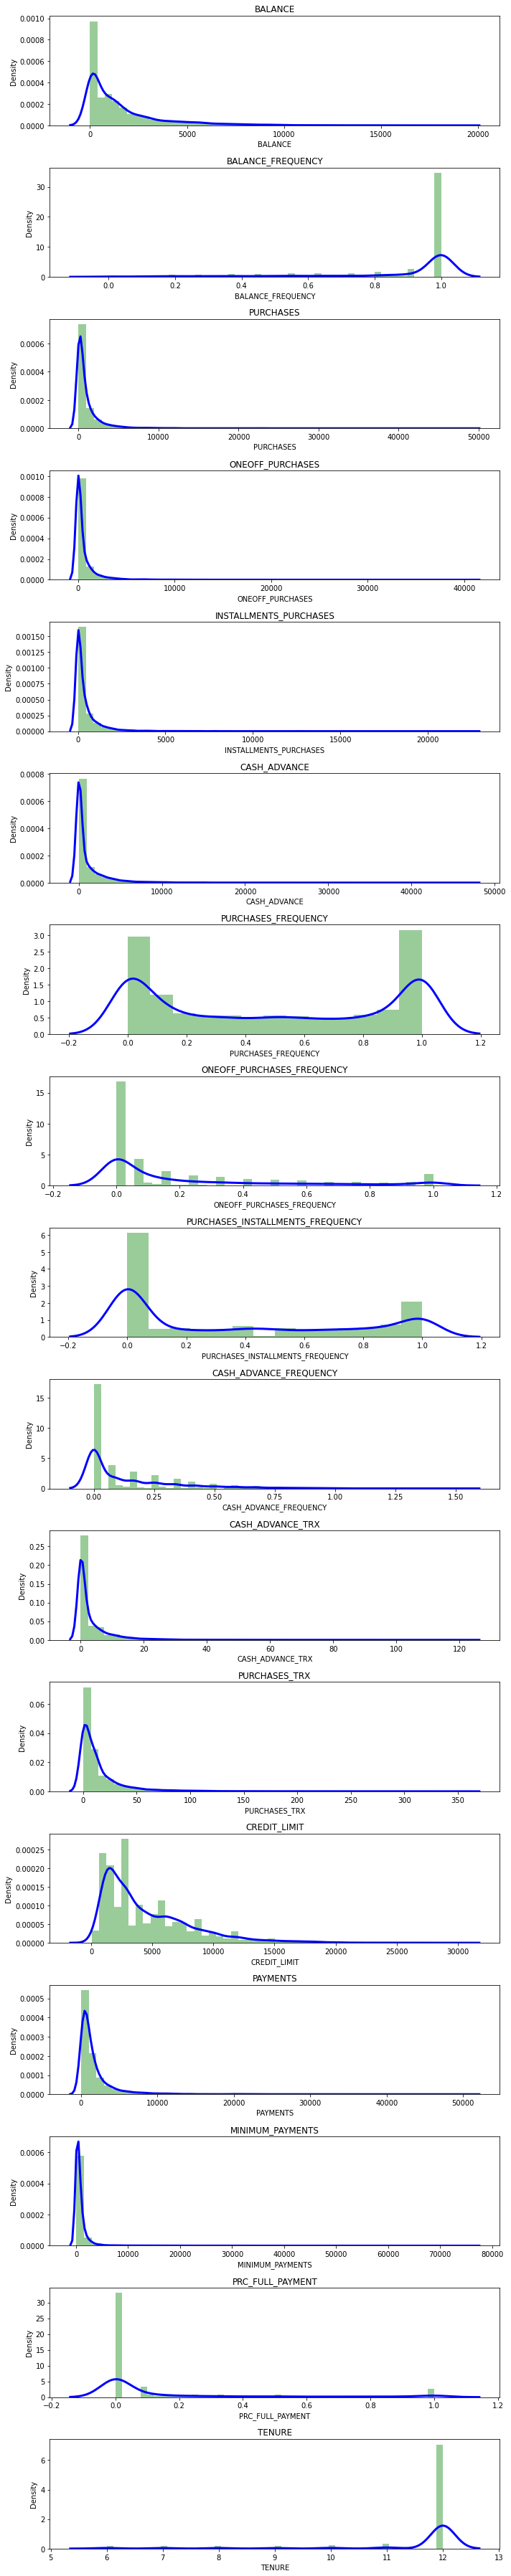

In [72]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

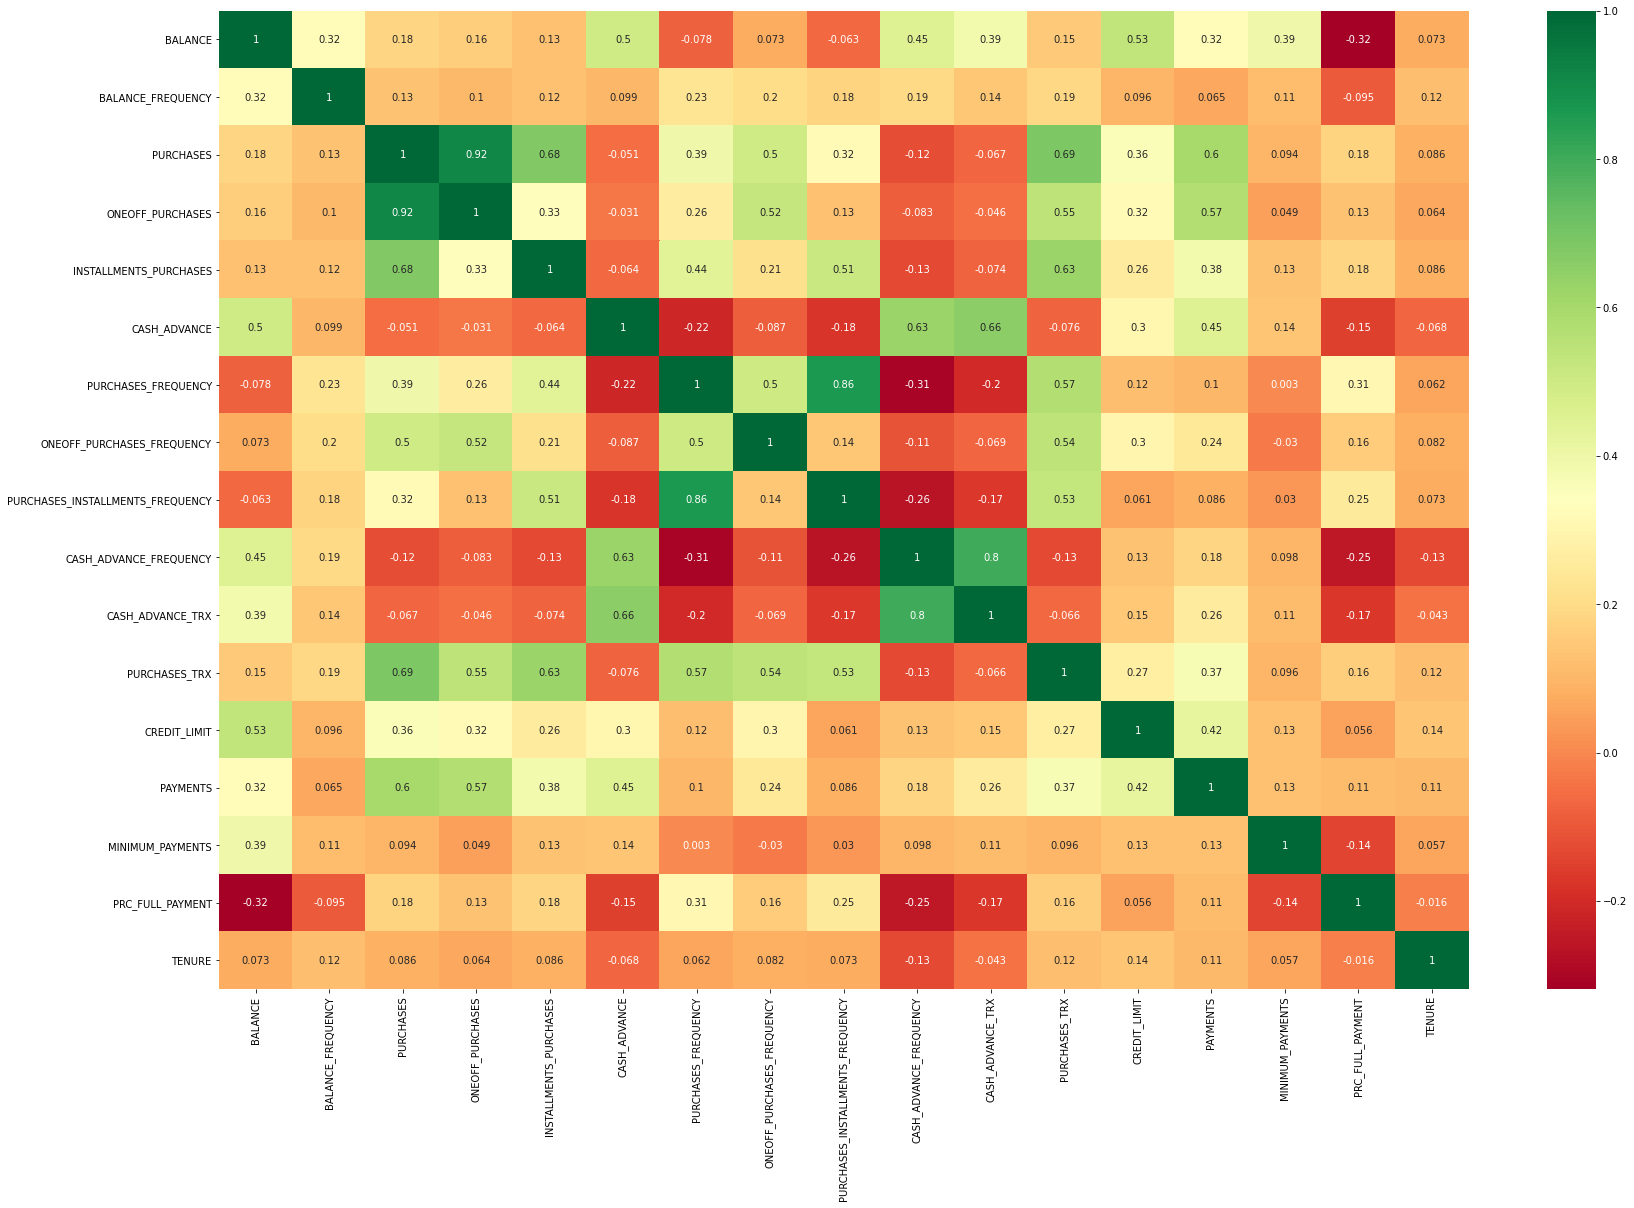

In [73]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (28,18))
sns.heatmap(creditcard_df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [74]:
#Find the highly correlated features.
correlated_features = set()
correlation_matrix = creditcard_df.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print(correlated_features)

{'PURCHASES_INSTALLMENTS_FREQUENCY', 'ONEOFF_PURCHASES'}


In [75]:
#drop the col having high correlation
creditcard_df.drop(['PURCHASES_INSTALLMENTS_FREQUENCY', 'ONEOFF_PURCHASES'],axis=1,inplace=True)

In [76]:
#scale the data first
scaler=StandardScaler()
creditcard_df_scales=scaler.fit_transform(creditcard_df)


In [77]:
creditcard_df_scales.shape

(8950, 15)

In [78]:
creditcard_df_scales

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [79]:
#find the kMeans

score_1=[]
#initialize the number of iteration
range_k= range(1,20)
for k in range_k:
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(creditcard_df_scales)
  score_1.append(kmeans.inertia_)

#we will obtain different kmeans value on each iteration.
#Stored kmeans value in score list



In [80]:
score_1

[134250.0,
 114464.60336031053,
 97696.04149796363,
 88894.168798851,
 81858.8004255349,
 75883.74212131942,
 70599.25221290714,
 67124.90713267295,
 62491.14093268966,
 58877.4668688988,
 56061.995141906875,
 53761.173552530345,
 51992.183522891944,
 50811.63495833084,
 49056.10788029639,
 47974.05113740865,
 46618.62743155778,
 45682.9017968125,
 44706.00490261199]

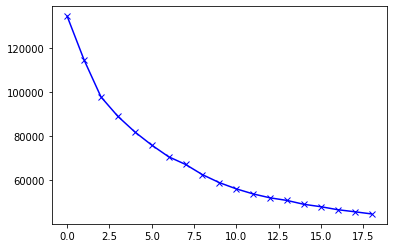

In [81]:
#graph with axis x= number of K , y=wcss value (wcss: within cluster sum of square)
plt.plot(score_1,'bx-')

In [82]:
#from the graph , we observ that 4th cluster seems to be forming elbow of the curve
#however value doesnt to reduce linearly until 8th cluster
#lets choose k=7 or k=8

In [83]:
kmeans = KMeans(7)
kmeans.fit(creditcard_df_scales)
#Apply kMeans on training data
labels = kmeans.labels_ #label/ cluster associating to each data points

In [84]:
#this is centroid of all clusters
kmeans.cluster_centers_.shape

(7, 15)

In [87]:
#create a data frame having kmeans centroid and col of creditcard_df
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.336876,-0.347048,-0.285339,-0.282873,0.065816,-0.177481,-0.288497,0.302614,-0.004735,-0.382931,-0.560489,-0.391212,-0.207099,0.020787,-3.177659
1,-0.699777,-2.140736,-0.309930,-0.298047,-0.321511,-0.529246,-0.447518,-0.519384,-0.374678,-0.411576,-0.176383,-0.201512,-0.257706,0.249233,0.208245
2,-0.412831,0.341019,-0.044131,0.238578,-0.399596,0.847712,-0.241884,-0.527001,-0.392288,0.109384,-0.314071,-0.243241,-0.079327,0.282441,0.264611
3,0.067076,0.414175,-0.371294,-0.405822,-0.050158,-0.883941,-0.438396,0.191204,0.027627,-0.493112,-0.285568,-0.237537,0.018136,-0.463740,0.270182
4,0.073458,0.434531,0.856549,0.467166,-0.312301,1.104756,1.854539,-0.403475,-0.321342,1.096969,0.673669,0.336255,-0.074560,0.439941,0.300665
5,1.717349,0.394274,-0.172639,-0.183845,2.039378,-0.402626,-0.172549,1.899494,1.934217,-0.203468,1.047070,0.867049,0.592378,-0.388929,0.082737
6,1.653500,0.438695,5.282878,4.937659,-0.035541,1.142727,1.567828,-0.281164,-0.109171,4.426062,1.972964,3.670684,1.170960,0.471930,0.309342


In [88]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,863.295641,0.795058,393.572648,155.269128,1116.889966,0.419119,0.116393,0.195700,3.216511,5.191589,2455.162694,600.624021,381.570361,0.159795,7.264798
1,107.948641,0.370150,341.035537,141.547227,304.646948,0.277939,0.068954,0.031210,0.691923,4.479600,3852.697289,1149.786249,263.633827,0.226611,11.796003
2,705.201665,0.958055,908.917850,626.810665,140.899463,0.830578,0.130299,0.029686,0.571752,17.428701,3351.729381,1028.984773,679.337739,0.236324,11.871435
3,1704.087728,0.975385,209.930129,44.087889,873.687825,0.135582,0.071676,0.173406,3.437358,2.452923,3455.435333,1045.496907,906.471187,0.018079,11.878891
4,1717.371500,0.980207,2833.234480,833.519913,323.961035,0.933743,0.755703,0.054405,1.055906,41.976378,6945.533286,2706.568795,690.447396,0.282390,11.919685
5,5138.991628,0.970671,634.359618,244.818830,5255.541703,0.328757,0.150983,0.515252,16.448436,9.652375,8304.118824,4243.165179,2244.718868,0.039960,11.628042
6,5006.095060,0.981194,12290.155038,4876.131450,904.339422,0.948982,0.670171,0.078880,2.503817,124.725191,11672.900763,12359.415519,3593.079458,0.291746,11.931298


In [89]:
labels.shape # Labels associated to each data point

(8950,)

In [90]:
labels.max()

6

In [91]:
labels.min()

0

In [92]:
y_kmeans = kmeans.fit_predict(creditcard_df_scales)
y_kmeans

array([5, 3, 6, ..., 0, 0, 0], dtype=int32)

In [93]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,95.4,0.000000,0.166667,0.000000,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.083333,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


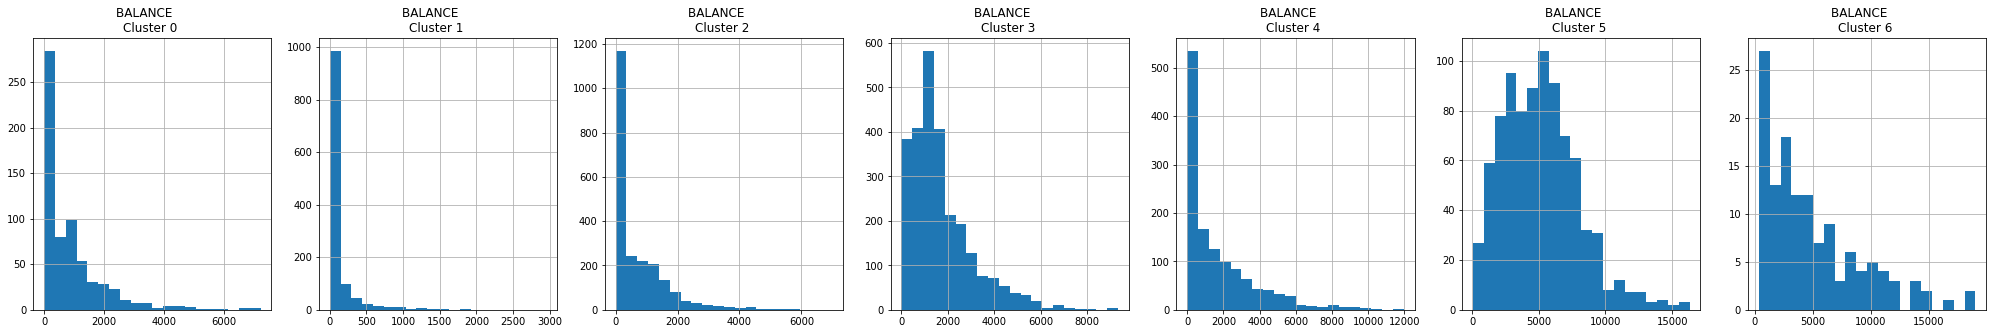

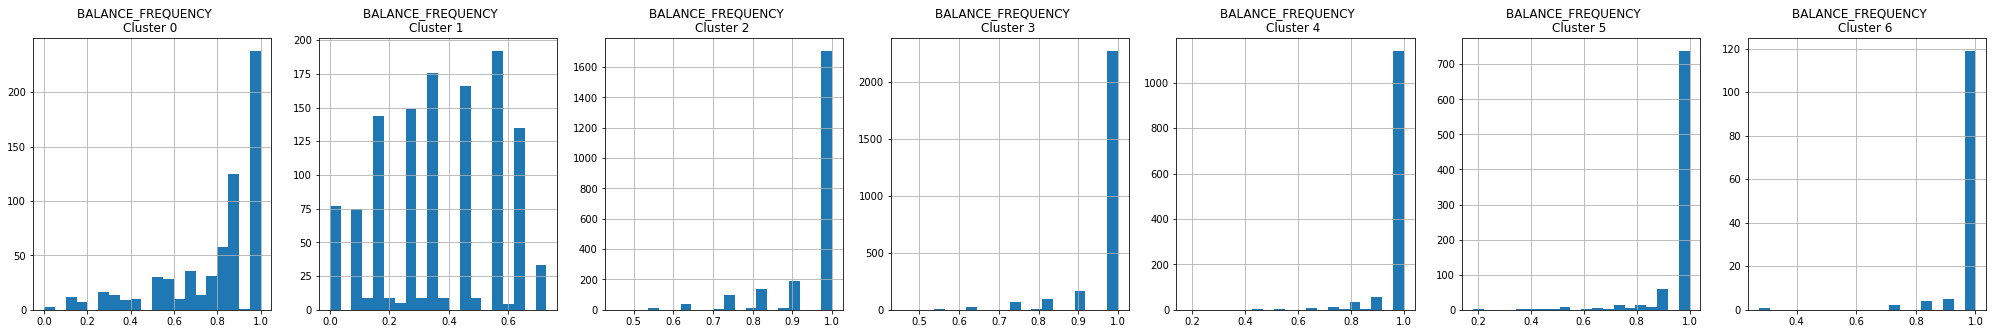

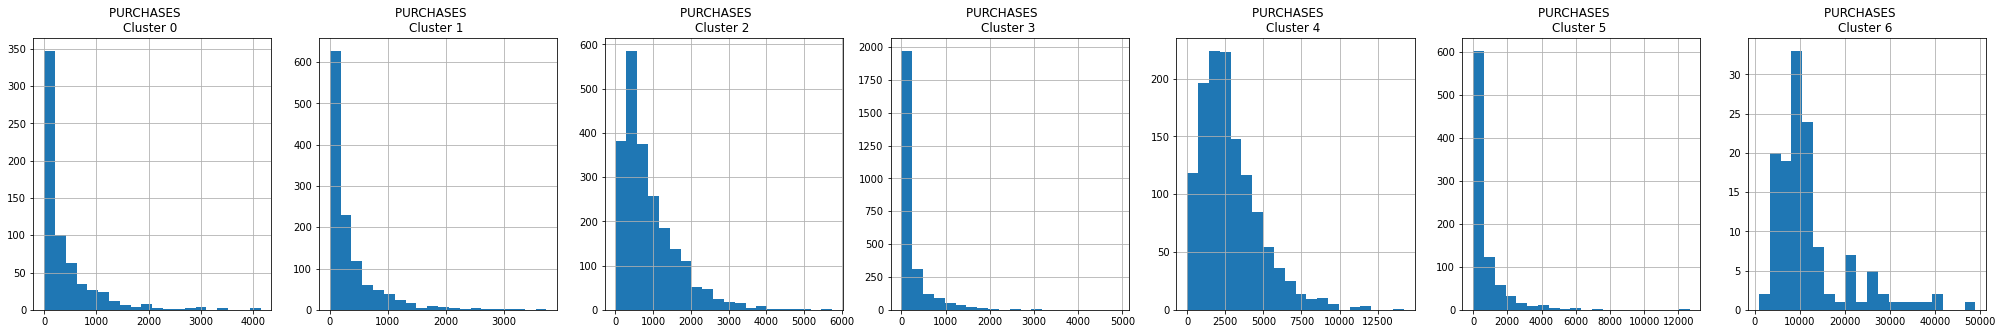

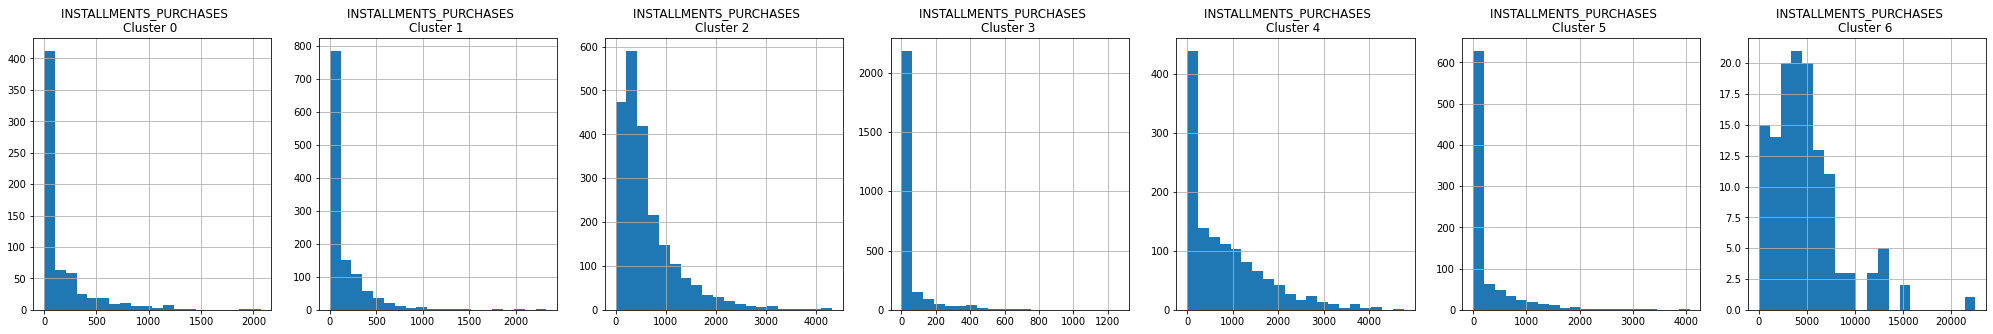

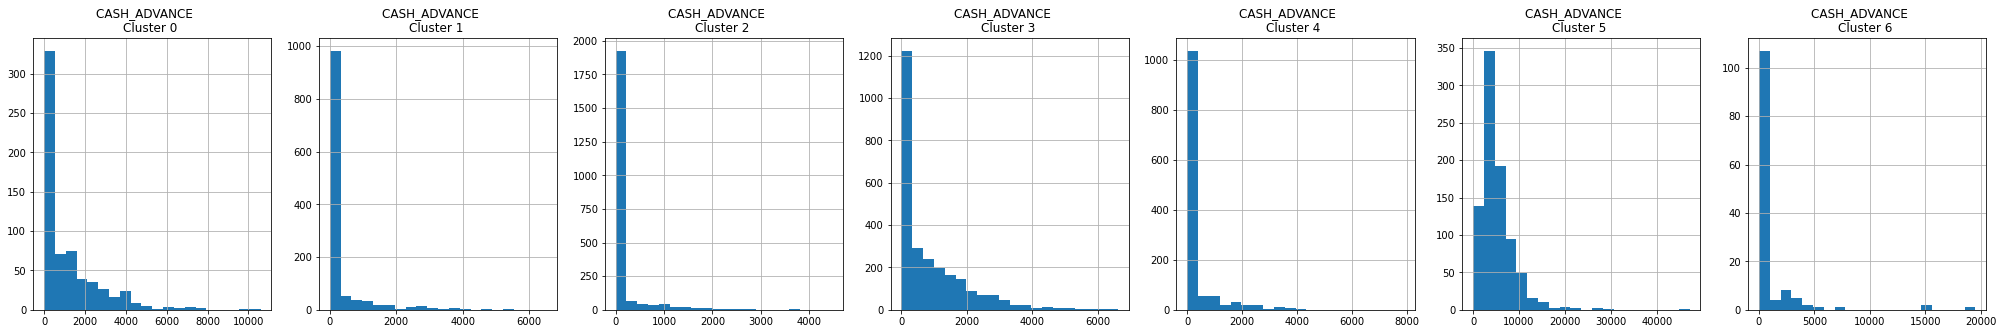

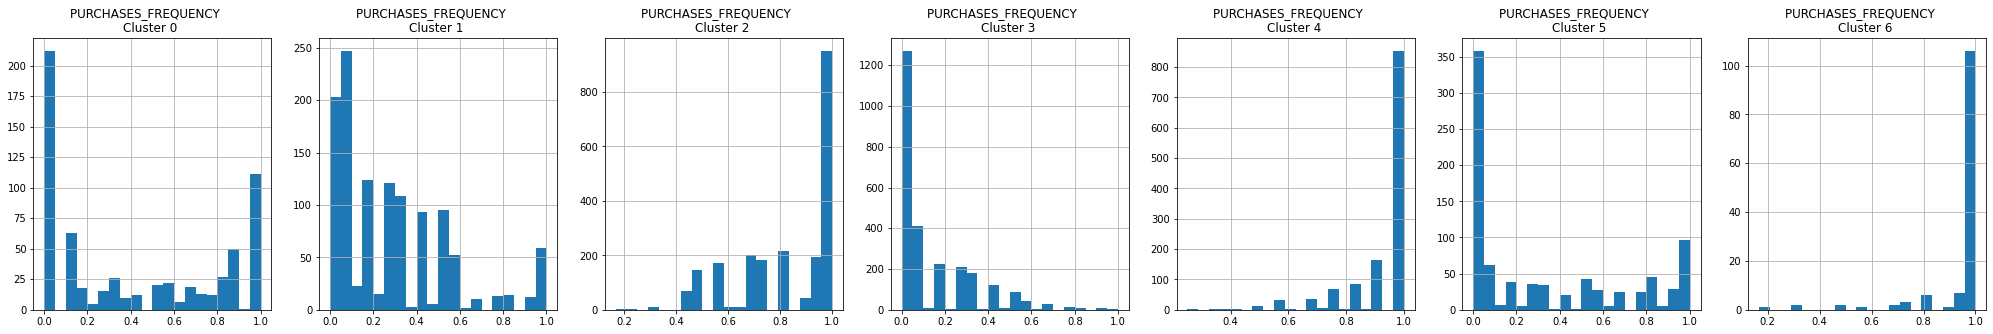

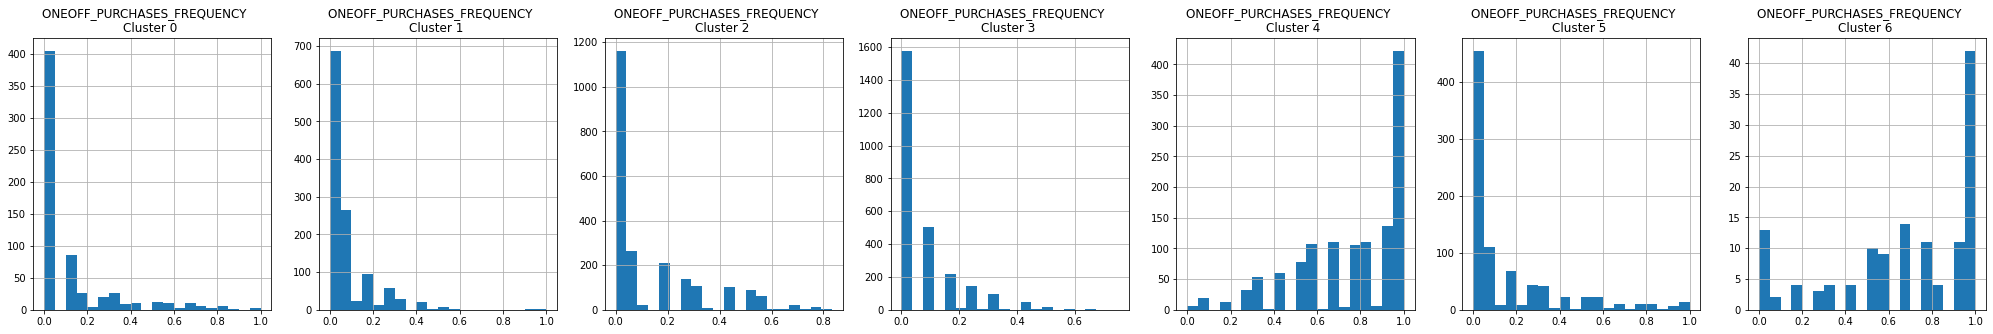

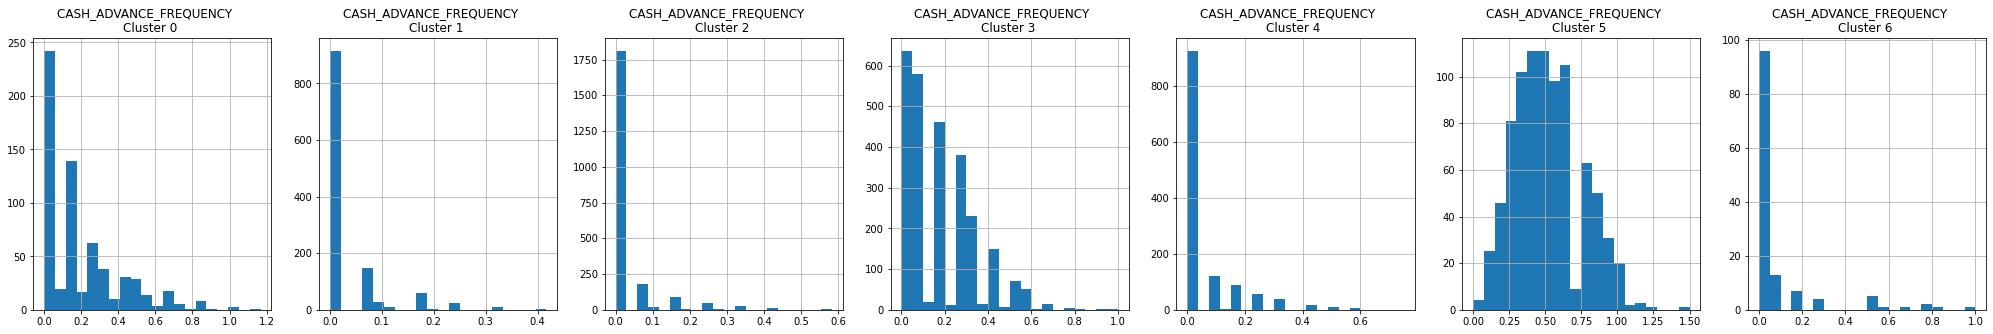

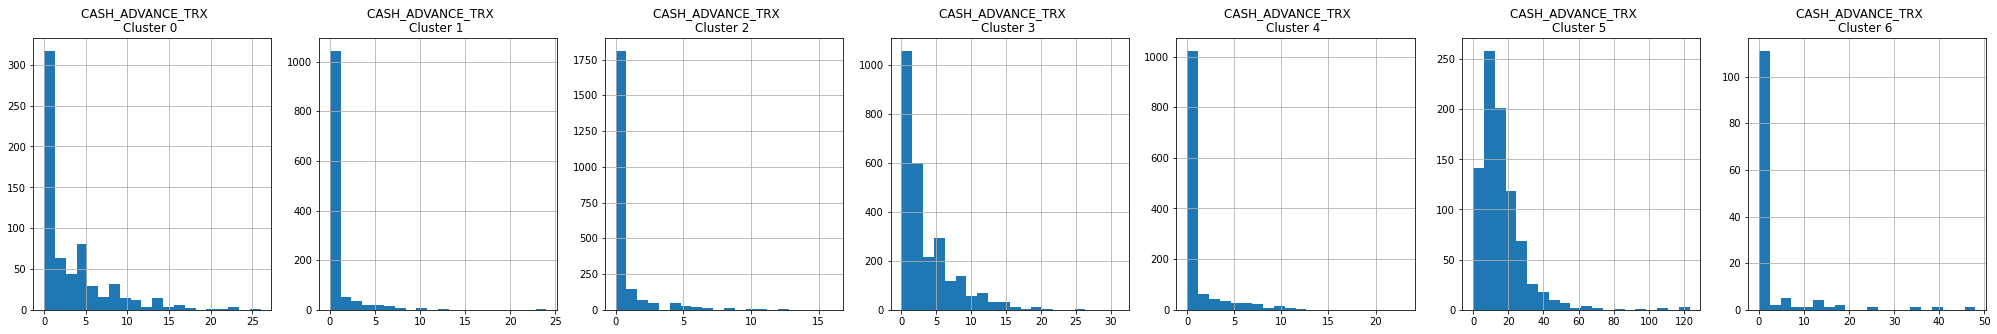

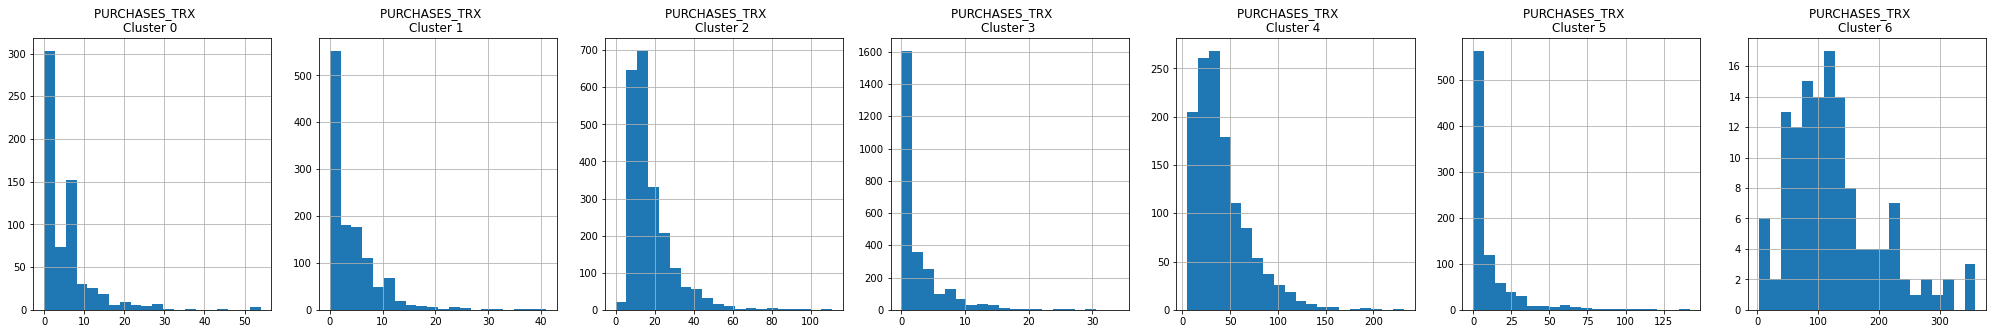

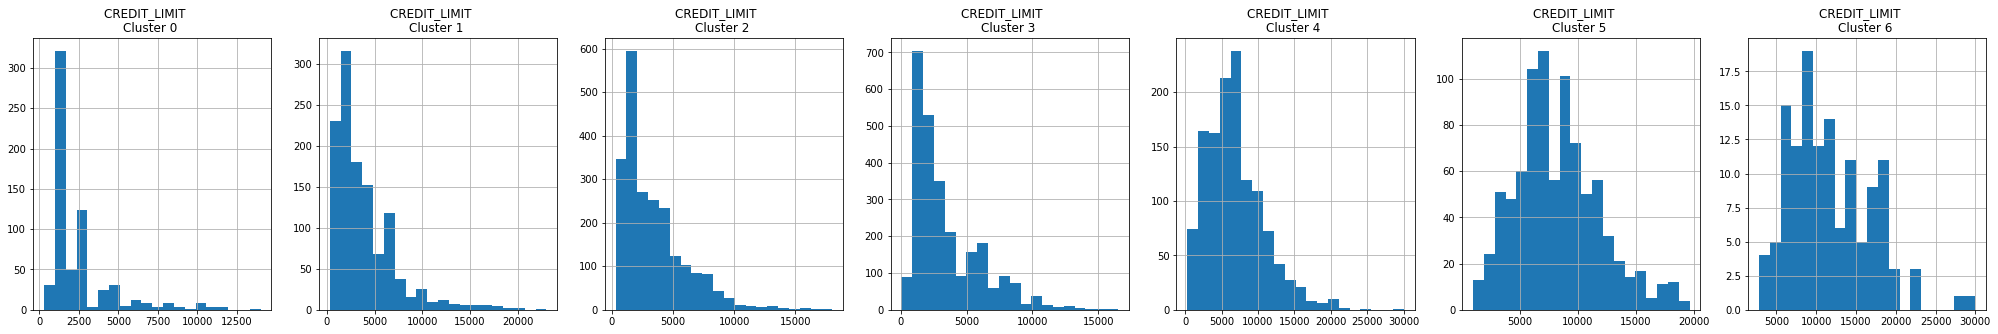

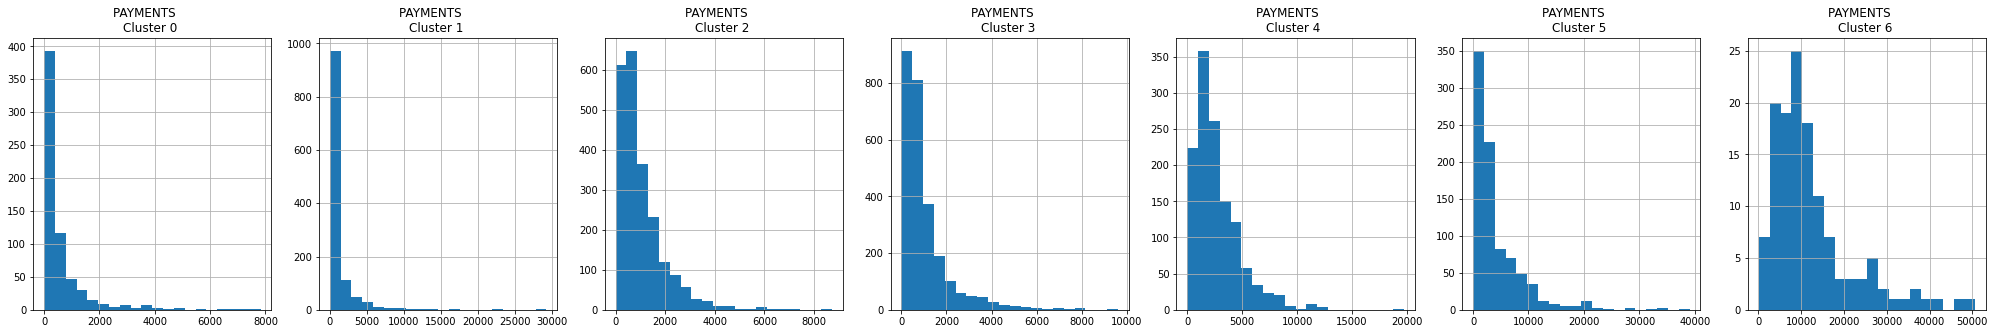

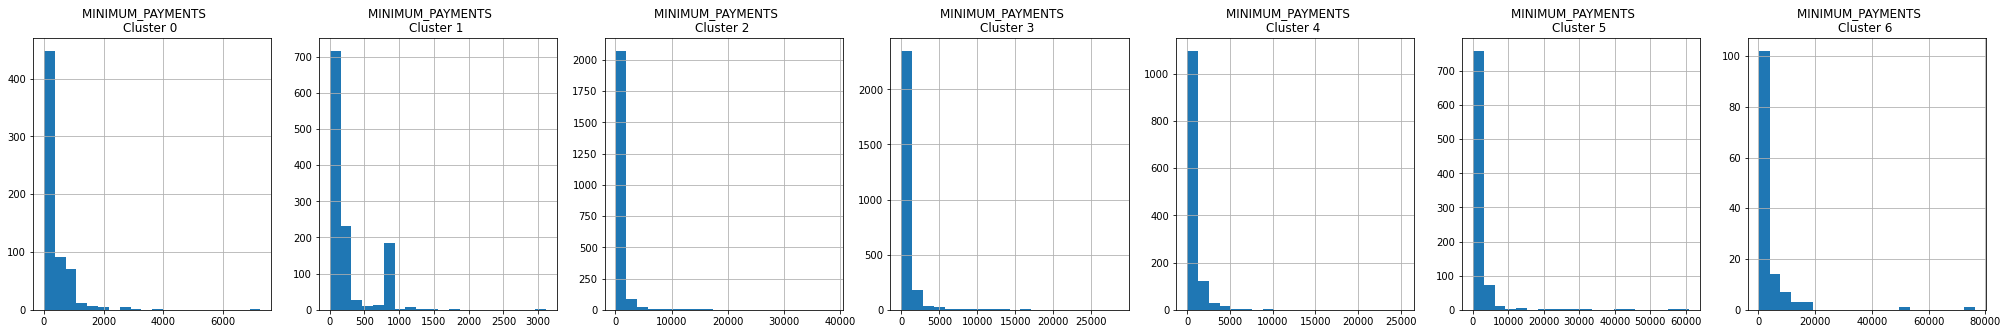

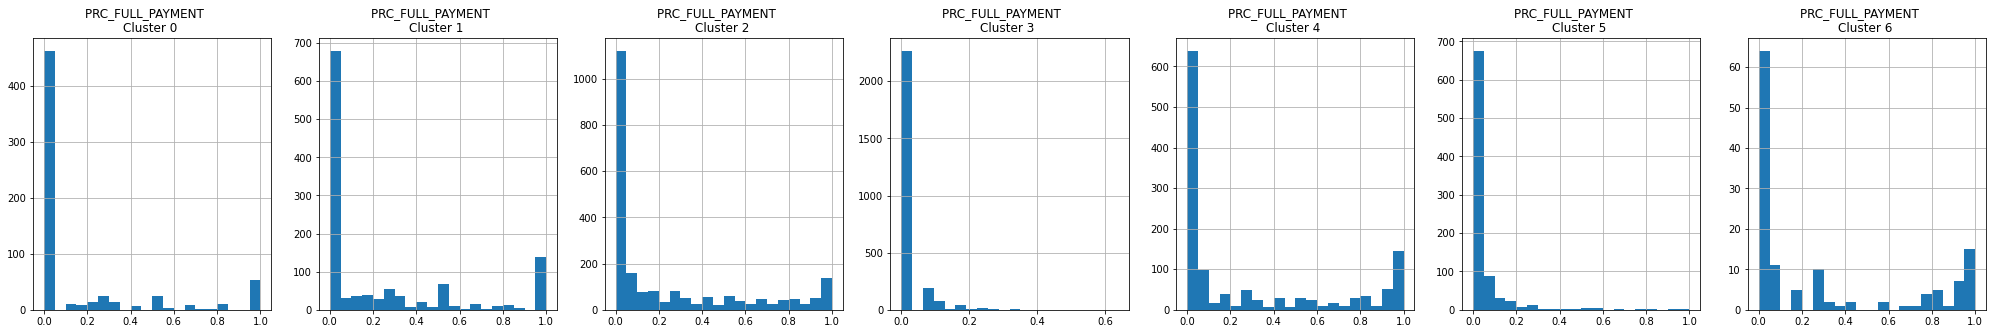

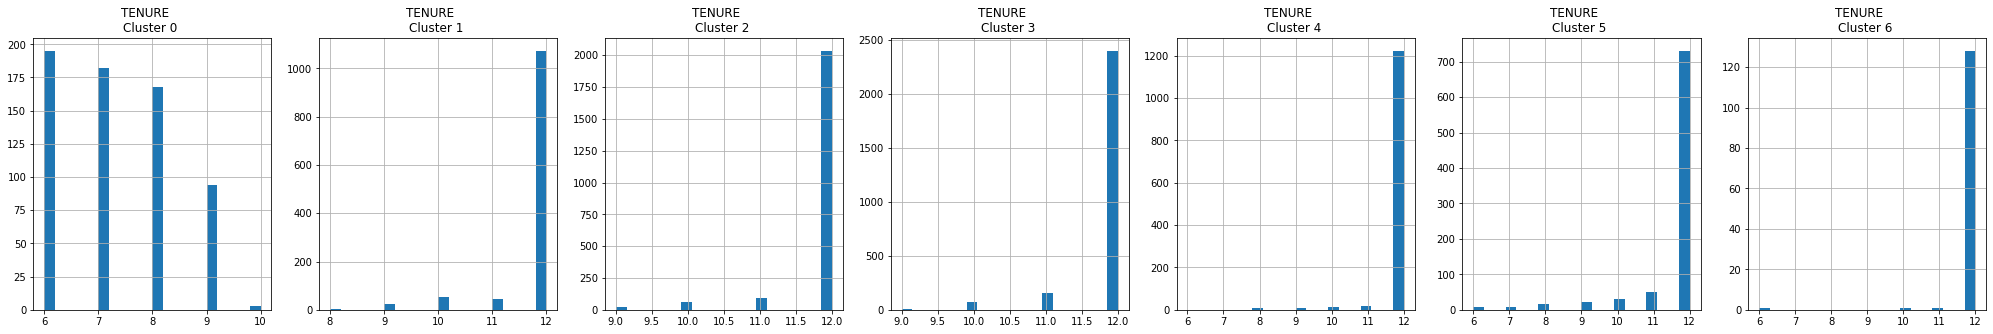

In [94]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

**Apply Principle component analysis and visualize the results**
**PCA**

Its a unsupervised machine learning algorithm.

PCA perform dimensionality reduction withouting lossing the orginal information from data.

PCA works on finding new features called *components* from data.

Components are composite of uncorrelated given input features.


In [95]:
# Obtain the principal components 
pca=PCA(n_components=2)

In [96]:
principal_comp=pca.fit_transform(creditcard_df_scales)

In [97]:
principal_comp

array([[-1.72854046, -0.83344386],
       [-0.31282936,  2.53153326],
       [ 1.19732353, -0.88381218],
       ...,
       [-1.50136574, -1.32068141],
       [-2.34543673, -0.28214334],
       [-0.63037714, -0.46668626]])

In [98]:
principal_comp.shape

(8950, 2)

In [99]:
# Create a dataframe(pca_df) with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.728540,-0.833444
1,-0.312829,2.531533
2,1.197324,-0.883812
3,-0.904752,0.002161
4,-1.498610,-0.526779


In [100]:
# Concatenate the clusters labels to the dataframe(pca_df)
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.728540,-0.833444,3
1,-0.312829,2.531533,5
2,1.197324,-0.883812,4
3,-0.904752,0.002161,3
4,-1.498610,-0.526779,3


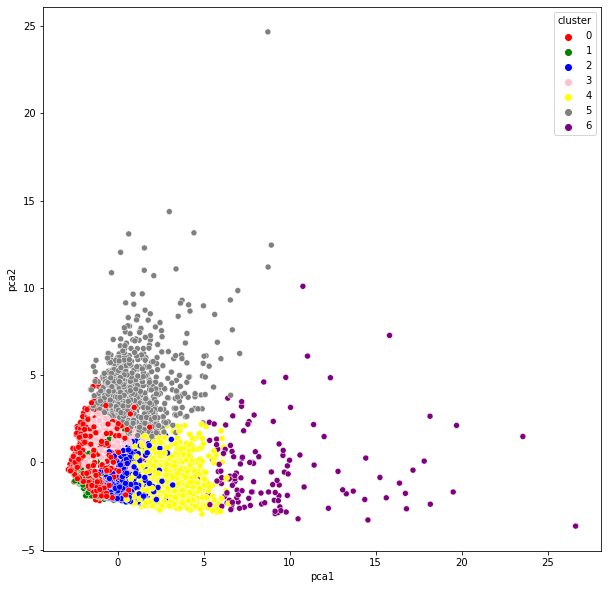

In [101]:
#visualize the clusters using principal components
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple'])
plt.show()